In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay


In [7]:
digits =load_digits()
X,y= digits.data,digits.target

In [8]:
pca=PCA(n_components=0.90)
x_pca=pca.fit_transform(X)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_pca_train, X_pca_test = train_test_split(x_pca, test_size=0.2, random_state=42)

In [13]:
svc_org=SVC()
svc_pca=SVC()

svc_org.fit(X_train,y_train)
svc_pca.fit(X_pca_train,y_train)


SVC()

In [16]:
y_pred_org=svc_org.predict(X_test)
y_pred_pca=svc_pca.predict(X_pca_test)

acc_org=accuracy_score(y_test,y_pred_org)
acc_pca=accuracy_score(y_test,y_pred_pca)

print(f"Original SVM Accuracy: {acc_org:.4f}" )
print(f"PCA SVM Accuracy: {acc_pca:.4f}" )



Original SVM Accuracy: 0.9861
PCA SVM Accuracy: 0.9861


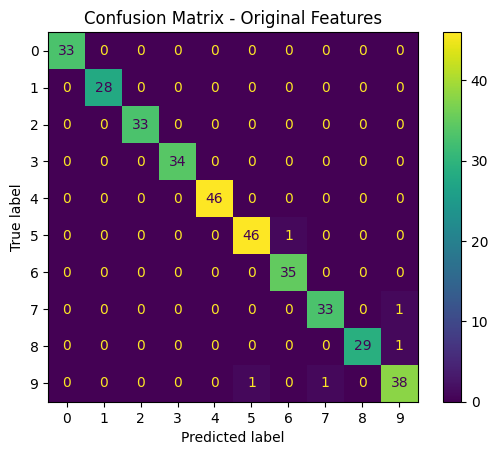

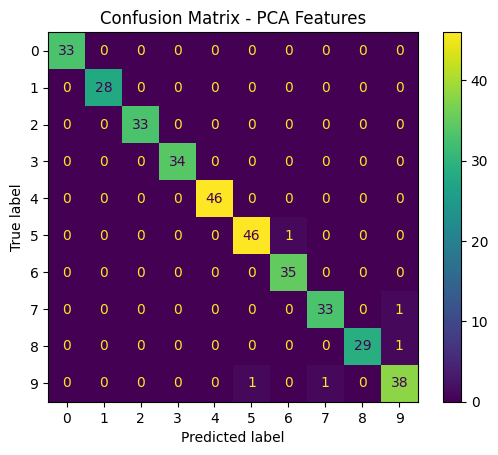

In [17]:
cm_org=confusion_matrix(y_test,y_pred_org)
cm_pca=confusion_matrix(y_test,y_pred_pca)

ConfusionMatrixDisplay(cm_org).plot()
plt.title("Confusion Matrix - Original Features")
plt.show()

ConfusionMatrixDisplay(cm_pca).plot()
plt.title("Confusion Matrix - PCA Features")
plt.show()

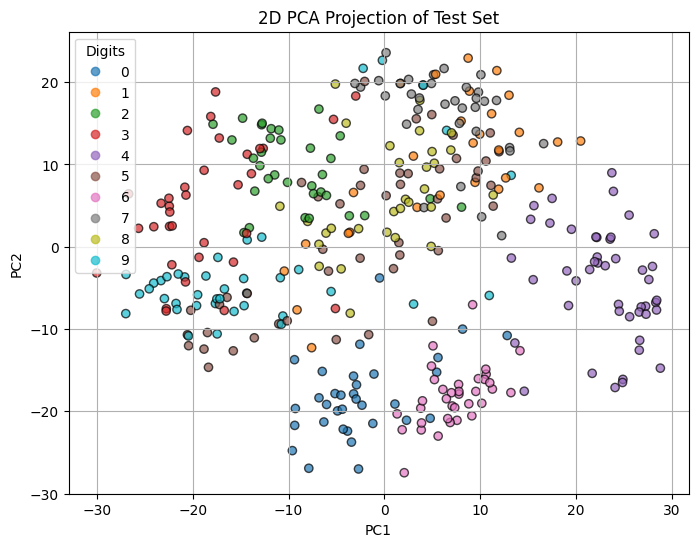

In [18]:
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_test)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_test, cmap='tab10', edgecolor='k', alpha=0.7)
plt.legend(*scatter.legend_elements(), title="Digits")
plt.title("2D PCA Projection of Test Set")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()